In [1]:
import os
from deepdta.interface import DeepDTA, Trainer
from deepdta.dataset import Dataset

Using TensorFlow backend.


In [2]:
import random as rn
import numpy as np
import tensorflow as tf # 2.4.1
print(tf.__version__)

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(1)
rn.seed(1)
tf.compat.v1.random.set_random_seed(0)

1.15.0


In [3]:
from keras import backend as K

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=0, inter_op_parallelism_threads=0)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)

2023-10-09 16:45:37.584743: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 16:45:37.588112: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2112000000 Hz
2023-10-09 16:45:37.588630: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8635c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-10-09 16:45:37.588640: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
OMP: Info #155: KMP_AFFINITY: Initial OS proc set respected: 0-19
OMP: Info #216: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #157: KMP_AFFINITY: 20 available OS procs
OMP: Info #159: KMP_AFFINITY: Nonuniform topology
OMP: Info #

In [4]:
from tdc.multi_pred import DTI

In [5]:
data = DTI(name = 'BindingDB_Kd')
data.convert_to_log(form='binding')
df_whole = data.harmonize_affinities(mode='max_affinity')

Found local copy...
Loading...
Done!
To log space...
The scale is converted to log scale, so we will take the maximum!
The original data has been updated!


In [6]:
frames = data.get_split(method='cold_drug', seed=2023, frac=[0.8, 0.1, 0.1])
df_tr = frames['train']
df_va = frames['valid']
df_te = frames['test']

In [7]:
MAX_SEQLEN_SMILES = 100
MAX_SEQLEN_PROTEIN = 1000

train_data = Dataset(df_tr.loc[:,'Drug'], df_tr.loc[:,'Target'], y=df_tr.loc[:,'Y'], max_seqlen_smiles=MAX_SEQLEN_SMILES, max_seqlen_protein=MAX_SEQLEN_PROTEIN)
valid_data = Dataset(df_va.loc[:,'Drug'], df_va.loc[:,'Target'], y=df_va.loc[:,'Y'], max_seqlen_smiles=MAX_SEQLEN_SMILES, max_seqlen_protein=MAX_SEQLEN_PROTEIN)
test_data  = Dataset(df_te.loc[:,'Drug'], df_te.loc[:,'Target'], y=df_te.loc[:,'Y'], max_seqlen_smiles=MAX_SEQLEN_SMILES, max_seqlen_protein=MAX_SEQLEN_PROTEIN)

In [8]:
model = DeepDTA(
    max_seqlen_smiles=MAX_SEQLEN_SMILES,
    max_seqlen_protein=MAX_SEQLEN_PROTEIN,
    vocab_size_smiles=train_data.vocab_size_smiles,
    vocab_size_protein=train_data.vocab_size_protein,
    num_filters=32,
    filter_size_smiles=8,
    filter_size_protein=12,
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 128)     8320        input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Em

In [9]:
trainer = Trainer(model)

In [10]:
history = trainer.train(train_data, test_data, valid_data, n_epochs=100)


Train on 36265 samples, validate on 2578 samples
Epoch 1/100


OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482103 thread 1 bound to OS proc set 2
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482102 thread 2 bound to OS proc set 4
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482134 thread 3 bound to OS proc set 6
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482135 thread 4 bound to OS proc set 8
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482136 thread 5 bound to OS proc set 10
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482137 thread 6 bound to OS proc set 12
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482138 thread 7 bound to OS proc set 14
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482139 thread 8 bound to OS proc set 16
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482140 thread 9 bound to OS proc set 17
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482141 thread 10 bound to OS proc set 18
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482142 thread 11 bound to OS proc set 19
OMP: Info #254: KMP_AFFINITY: pid 482022 tid 482143 thread 12 bound

 - 104s - loss: 2.5131 - cindex_score: 0.6671 - val_loss: 1.5964 - val_cindex_score: 0.6621
Epoch 2/100
 - 101s - loss: 1.0638 - cindex_score: 0.7607 - val_loss: 1.3818 - val_cindex_score: 0.7038
Epoch 3/100
 - 101s - loss: 0.9343 - cindex_score: 0.7836 - val_loss: 1.3003 - val_cindex_score: 0.6897
Epoch 4/100
 - 101s - loss: 0.8933 - cindex_score: 0.7899 - val_loss: 1.4665 - val_cindex_score: 0.7040
Epoch 5/100
 - 100s - loss: 0.8666 - cindex_score: 0.7977 - val_loss: 1.4543 - val_cindex_score: 0.6911
Epoch 6/100
 - 101s - loss: 0.8425 - cindex_score: 0.8019 - val_loss: 1.2609 - val_cindex_score: 0.7165
Epoch 7/100
 - 101s - loss: 0.8026 - cindex_score: 0.8053 - val_loss: 1.2027 - val_cindex_score: 0.7044
Epoch 8/100
 - 102s - loss: 0.7908 - cindex_score: 0.8111 - val_loss: 1.2018 - val_cindex_score: 0.7072
Epoch 9/100
 - 101s - loss: 0.7633 - cindex_score: 0.8114 - val_loss: 1.2652 - val_cindex_score: 0.7115
Epoch 10/100
 - 101s - loss: 0.7263 - cindex_score: 0.8143 - val_loss: 1.345

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

In [12]:
df_history = pd.DataFrame(history.history).reset_index().rename(columns={'index':'epoch'})

In [13]:
df_history

,epoch,val_loss,val_cindex_score,loss,cindex_score
0,0,1.596445,0.662057,2.513089,0.667137
1,1,1.381806,0.703777,1.063847,0.760713
2,2,1.300344,0.689662,0.934282,0.783569
3,3,1.466468,0.704007,0.893334,0.789890
4,4,1.454264,0.691109,0.866610,0.797666
5,5,1.260944,0.716507,0.842545,0.801878
6,6,1.202709,0.704405,0.802616,0.805271
7,7,1.201783,0.707195,0.790769,0.811112
8,8,1.265213,0.711536,0.763264,0.811386
9,9,1.345559,0.733858,0.726324,0.814270


In [14]:
def make_lineplot(df, label):
    ## data preprocessing
    df_tr = df.loc[:,['epoch', label]]
    df_tr.loc[:,'label'] = 'Training'
    df_va = df.loc[:,['epoch', f'val_{label}']].rename(columns={f'val_{label}':label})
    df_va.loc[:,'label'] = 'Validation'
    df_merge = pd.concat([df_tr, df_va], ignore_index=True)
    
    ## figure
    fig, ax = plt.subplots(1,1,figsize=(5,2.5))
    
    ## plot
    sns.lineplot(data=df_merge, x='epoch', y=label, hue='label', ax=ax)
    
    ax.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

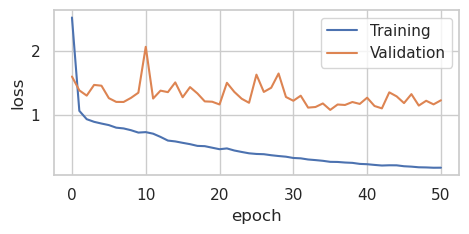

In [15]:
make_lineplot(df_history, 'loss')

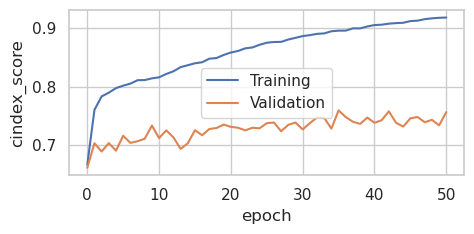

In [16]:
make_lineplot(df_history, 'cindex_score')